# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science:  Spotify Final Project



**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader<br/>
**Group Members**: Tejal Patwardhan, Akshitha Ramachandran, Grace Zhang
<hr style="height:2pt">

In [27]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [28]:
# import necessary notebooks
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.preprocessing import PolynomialFeatures

from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import random

%matplotlib inline

<hr style="height:2pt">

# Data Collection and Cleaning

We collected our data by using the Spotify API to create a json file of tracks and their features. Additionally, we labeled each track with a new feature , `in_playlist`, which equals 1 if Grace would include the track in her playlist and 0 if Grace would not include the track in her playlist. 

We accomplished this by manually creating 2 separate playlists, where one playlist includes random songs that Grace would include in her playlist and the other playlist includes random songs that Grace would not include in her playlist. We used the Spotify API `user_playlist_tracks` endpoint to collect some features, including `track_id`s, of the tracks in each of these playlists. We then used the `audio_features` endpoint of the Spotify API to get additional features like `danceability`, etc. for each of our tracks. Finally, we added the `in_playlist` feature to each of our tracks and wrote our final object to `spotify.json`.


<hr style="height:2pt">

# Data Description
Our data includes the following features:
- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- `energy`: Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. A value of 0.0 is least energetic and 1.0 is most energetic. 
- `key`: The estimated overall key of the track. Integers map to pitches using standard Pitch Class Notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values range between -60 and 0 db. 
- `mode`: Mode represents the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Mode is binary; major is represented by 1 and minor is 0.
- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- `duration_ms`: The duration of the track in milliseconds.
- `time_signature`: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- `popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. 
- `in_playlist`: Response variable. Categorical variable for whether in playlist of desire. 1 if in playlist, 0 if not in playlist.

The following features were recorded to help with visualization later, but not used as predictors in our analysis, as they are not characteristics of the music itself.
- `name`: Song title
- `artist`: First artist of song
- `type`: The object type: “audio_features”
- `id`: The Spotify ID for the track.
- `uri`: The Spotify URI for the track.
- `track_href`: A link to the Web API endpoint providing full details of the track.
- `analysis_url`: An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.

# Exploratory Data Analysis

In [29]:
random.seed(1)

In [30]:
# load in dataset
spotify_df = pd.read_csv("data/spotify-more2.csv")

# drop unnecessary columns
spotify_df = spotify_df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'name', 'artist', 'Unnamed: 0'])

In [31]:
# display head of data
display(spotify_df.head())

acousticness  danceability  duration_ms  energy  in_playlist  instrumentalness  key  liveness  loudness  mode  popularity  speechiness    tempo  time_signature  valence
0         0.929         0.516       138760  0.0663            0          0.000972    7    0.1120   -19.221     0          11       0.0334  109.879               4    0.278
1         0.539         0.454       324133  0.2600            0          0.000780    8    0.0675   -13.193     0          63       0.0401  174.322               5    0.598
2         0.360         0.676       205773  0.4400            0          0.000069    0    0.1620   -11.960     1          59       0.0291   80.434               4    0.499
3         0.984         0.466       294307  0.0718            0          0.000931    0    0.1070   -17.999     1          56       0.0374  121.885               4    0.196
4         0.779         0.496       423573  0.6340            0          0.402000    5    0.0746   -10.328     0          60       0.0364   93.357               4    0.606

In [32]:
# display shape of data
display(spotify_df[spotify_df["in_playlist"]==0].shape)

(2500, 15)

We have 5060 songs in our initial analysis. 2650 are included in Grace's playlist, and 2500 are not included in Grace's playlist. 

In [33]:
# generate summary chart of features
features = []
means = []
var = []
ranges = []
mins = []
maxes = []

for feature in spotify_df:
    if feature != "in_playlist":
        features.append(feature)
        means.append(spotify_df[feature].mean())
        var.append(spotify_df[feature].var())
        ranges.append(spotify_df[feature].ptp())
        mins.append(spotify_df[feature].min())
        maxes.append(spotify_df[feature].max())

summary_df = pd.DataFrame(data = {'feature': features, 
                                  'mean': means,
                                  'var' : var,
                                  'range': ranges, 
                                  'min': mins, 
                                  'max': maxes}) 

Below are summary statistics for all the features we plan to analyze:

In [34]:
display(summary_df)

feature           mean           var         range           min          max
0       acousticness       0.540199  1.267884e-01  9.959953e-01      0.000005        0.996
1       danceability       0.570920  2.931912e-02  9.162000e-01      0.061800        0.978
2        duration_ms  245718.492885  1.911563e+10  3.346533e+06  44507.000000  3391040.000
3             energy       0.439224  6.633419e-02  9.901450e-01      0.000855        0.991
4   instrumentalness       0.143138  9.302492e-02  9.870000e-01      0.000000        0.987
5                key       5.223913  1.251578e+01  1.100000e+01      0.000000       11.000
6           liveness       0.163377  1.798945e-02  9.800000e-01      0.012000        0.992
7           loudness     -10.270219  3.464989e+01  4.217600e+01    -42.476000       -0.300
8               mode       0.650198  2.274856e-01  1.000000e+00      0.000000        1.000
9         popularity      36.977470  4.773025e+02  1.000000e+02      0.000000      100.000
10       speechiness       0.070655  6.217856e-03  8.989000e-01      0.023100        0.922
11             tempo     117.657563  8.604272e+02  1.790410e+02     42.581000      221.622
12    time_signature       3.919763  1.655315e-01  5.000000e+00      0.000000        5.000
13           valence       0.425801  5.455384e-02  9.591000e-01      0.025900        0.985

We can see that all features have values that are expected as per the Spotify API documentation. To analyze each feature in more granularity we looked at density plots. 

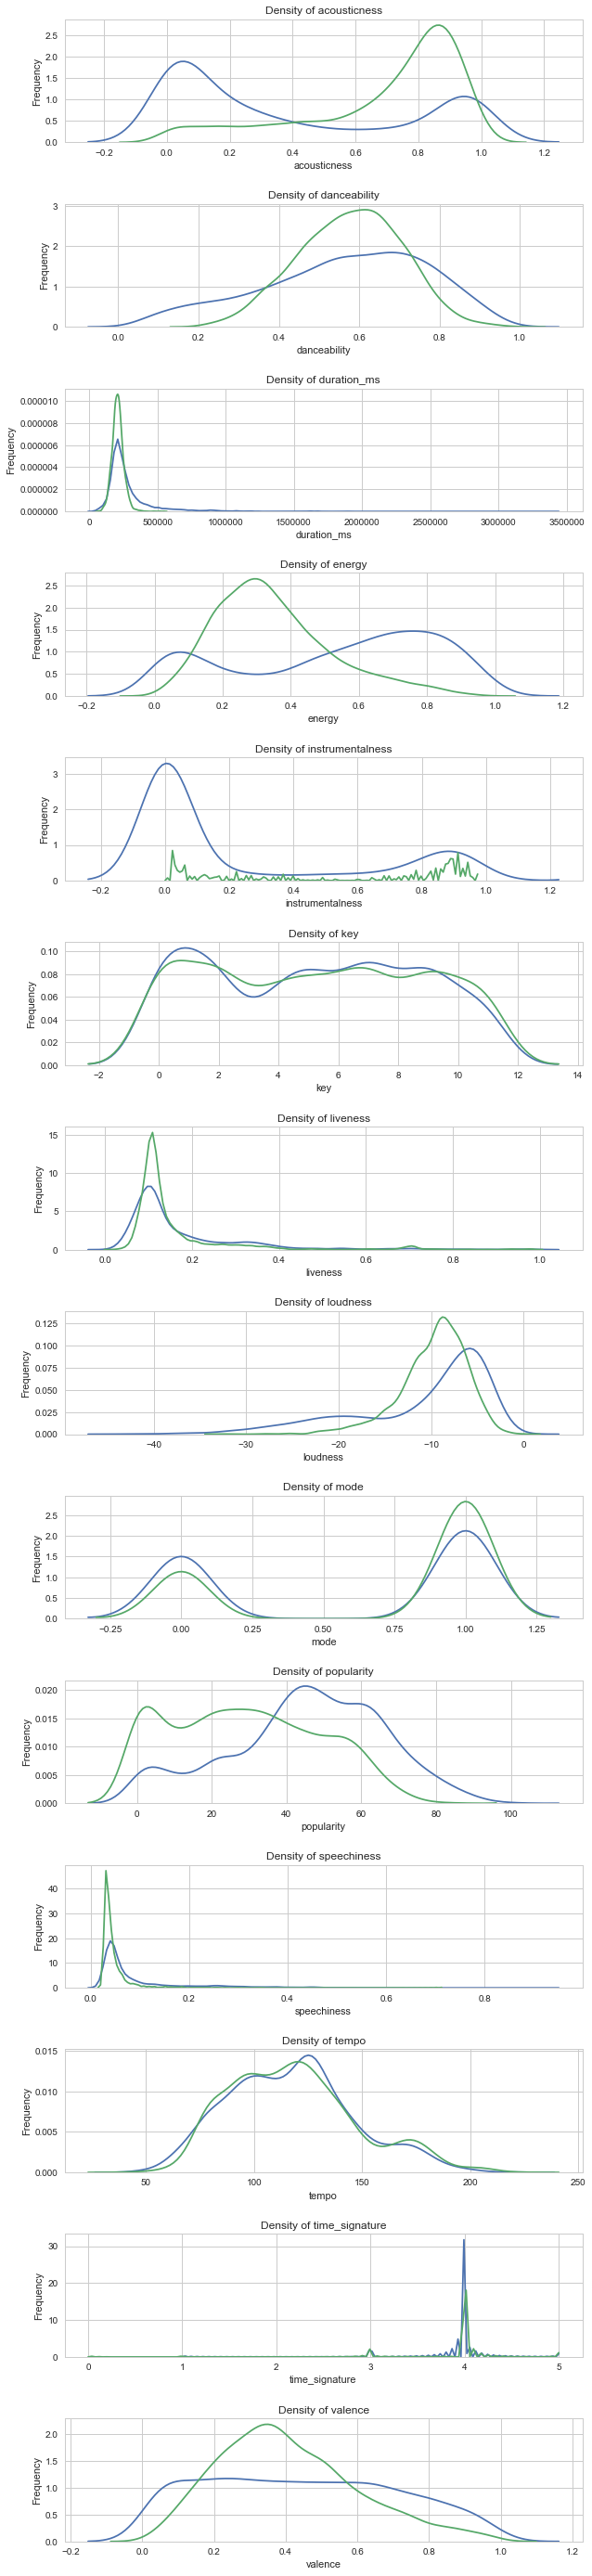

In [35]:
response_col = 'in_playlist'
resp_col_loc = list(spotify_df.columns).index('in_playlist')
spotify_graphs_df = spotify_df.drop(columns=[response_col])
num_cols = len(spotify_graphs_df.columns)
nbin = 15

# iterate through all the features and display them
fig, axs = plt.subplots(num_cols, 1, figsize=(10,50))
for i in range(num_cols):
    sns.distplot(spotify_graphs_df[spotify_df.in_playlist == 0][spotify_graphs_df.columns[i]], hist = False, kde = True, ax=axs[i])
    sns.distplot(spotify_graphs_df[spotify_df.in_playlist == 1][spotify_graphs_df.columns[i]], hist = False, kde = True, ax=axs[i])
    axs[i].set_title("Density of " + str(spotify_graphs_df.columns[i]))
    axs[i].set_ylabel(r'Frequency')
fig.subplots_adjust(hspace=.5)
plt.show()

Looking at the density plots above, we note some features that show clear differences in distribution between the playlist and non-playlist. 
While non-playlist songs contain a roughly uniform distribution of energy values, playlist songs spike at an energy level between 0.2-0.4.
Acousticness in playlist tracks is much higher on average, spiking around 0.8, while non-playlist tracks most frequently have acousticness values around 0.1.
Instrumentalness is a particularly interesting feature. While the distribution non-playlist tracks is bimodal, peaking at around 0 and 0.9, playlist tracks have a few very well-defined peaks between 0 and 0.3. 
We will note in advance that this may induce a risk of overfitting based on instrumentalness values.
Playlist tracks have lower loudnesses on average, centering around -10, while non-playlist tracks -5.
In terms of speechiness, the distribution for playlist tracks has a much lower variance and slightly lower expected value, centering around 0.3 while non-playlist tracks center around 0.4.
Valence for non-playlist tracks is roughly uniformly distributed, while playlist tracks demonstrate a roughly normal distribution centered around 0.3.
Finally in terms of popularity, playlist tracks show a peak in their distribution around 60, while non-playlist tracks have a more variable distribution with a peak between 45-55.
The rest of the features are roughly similar in distribution between playlist and non-playlist tracks.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


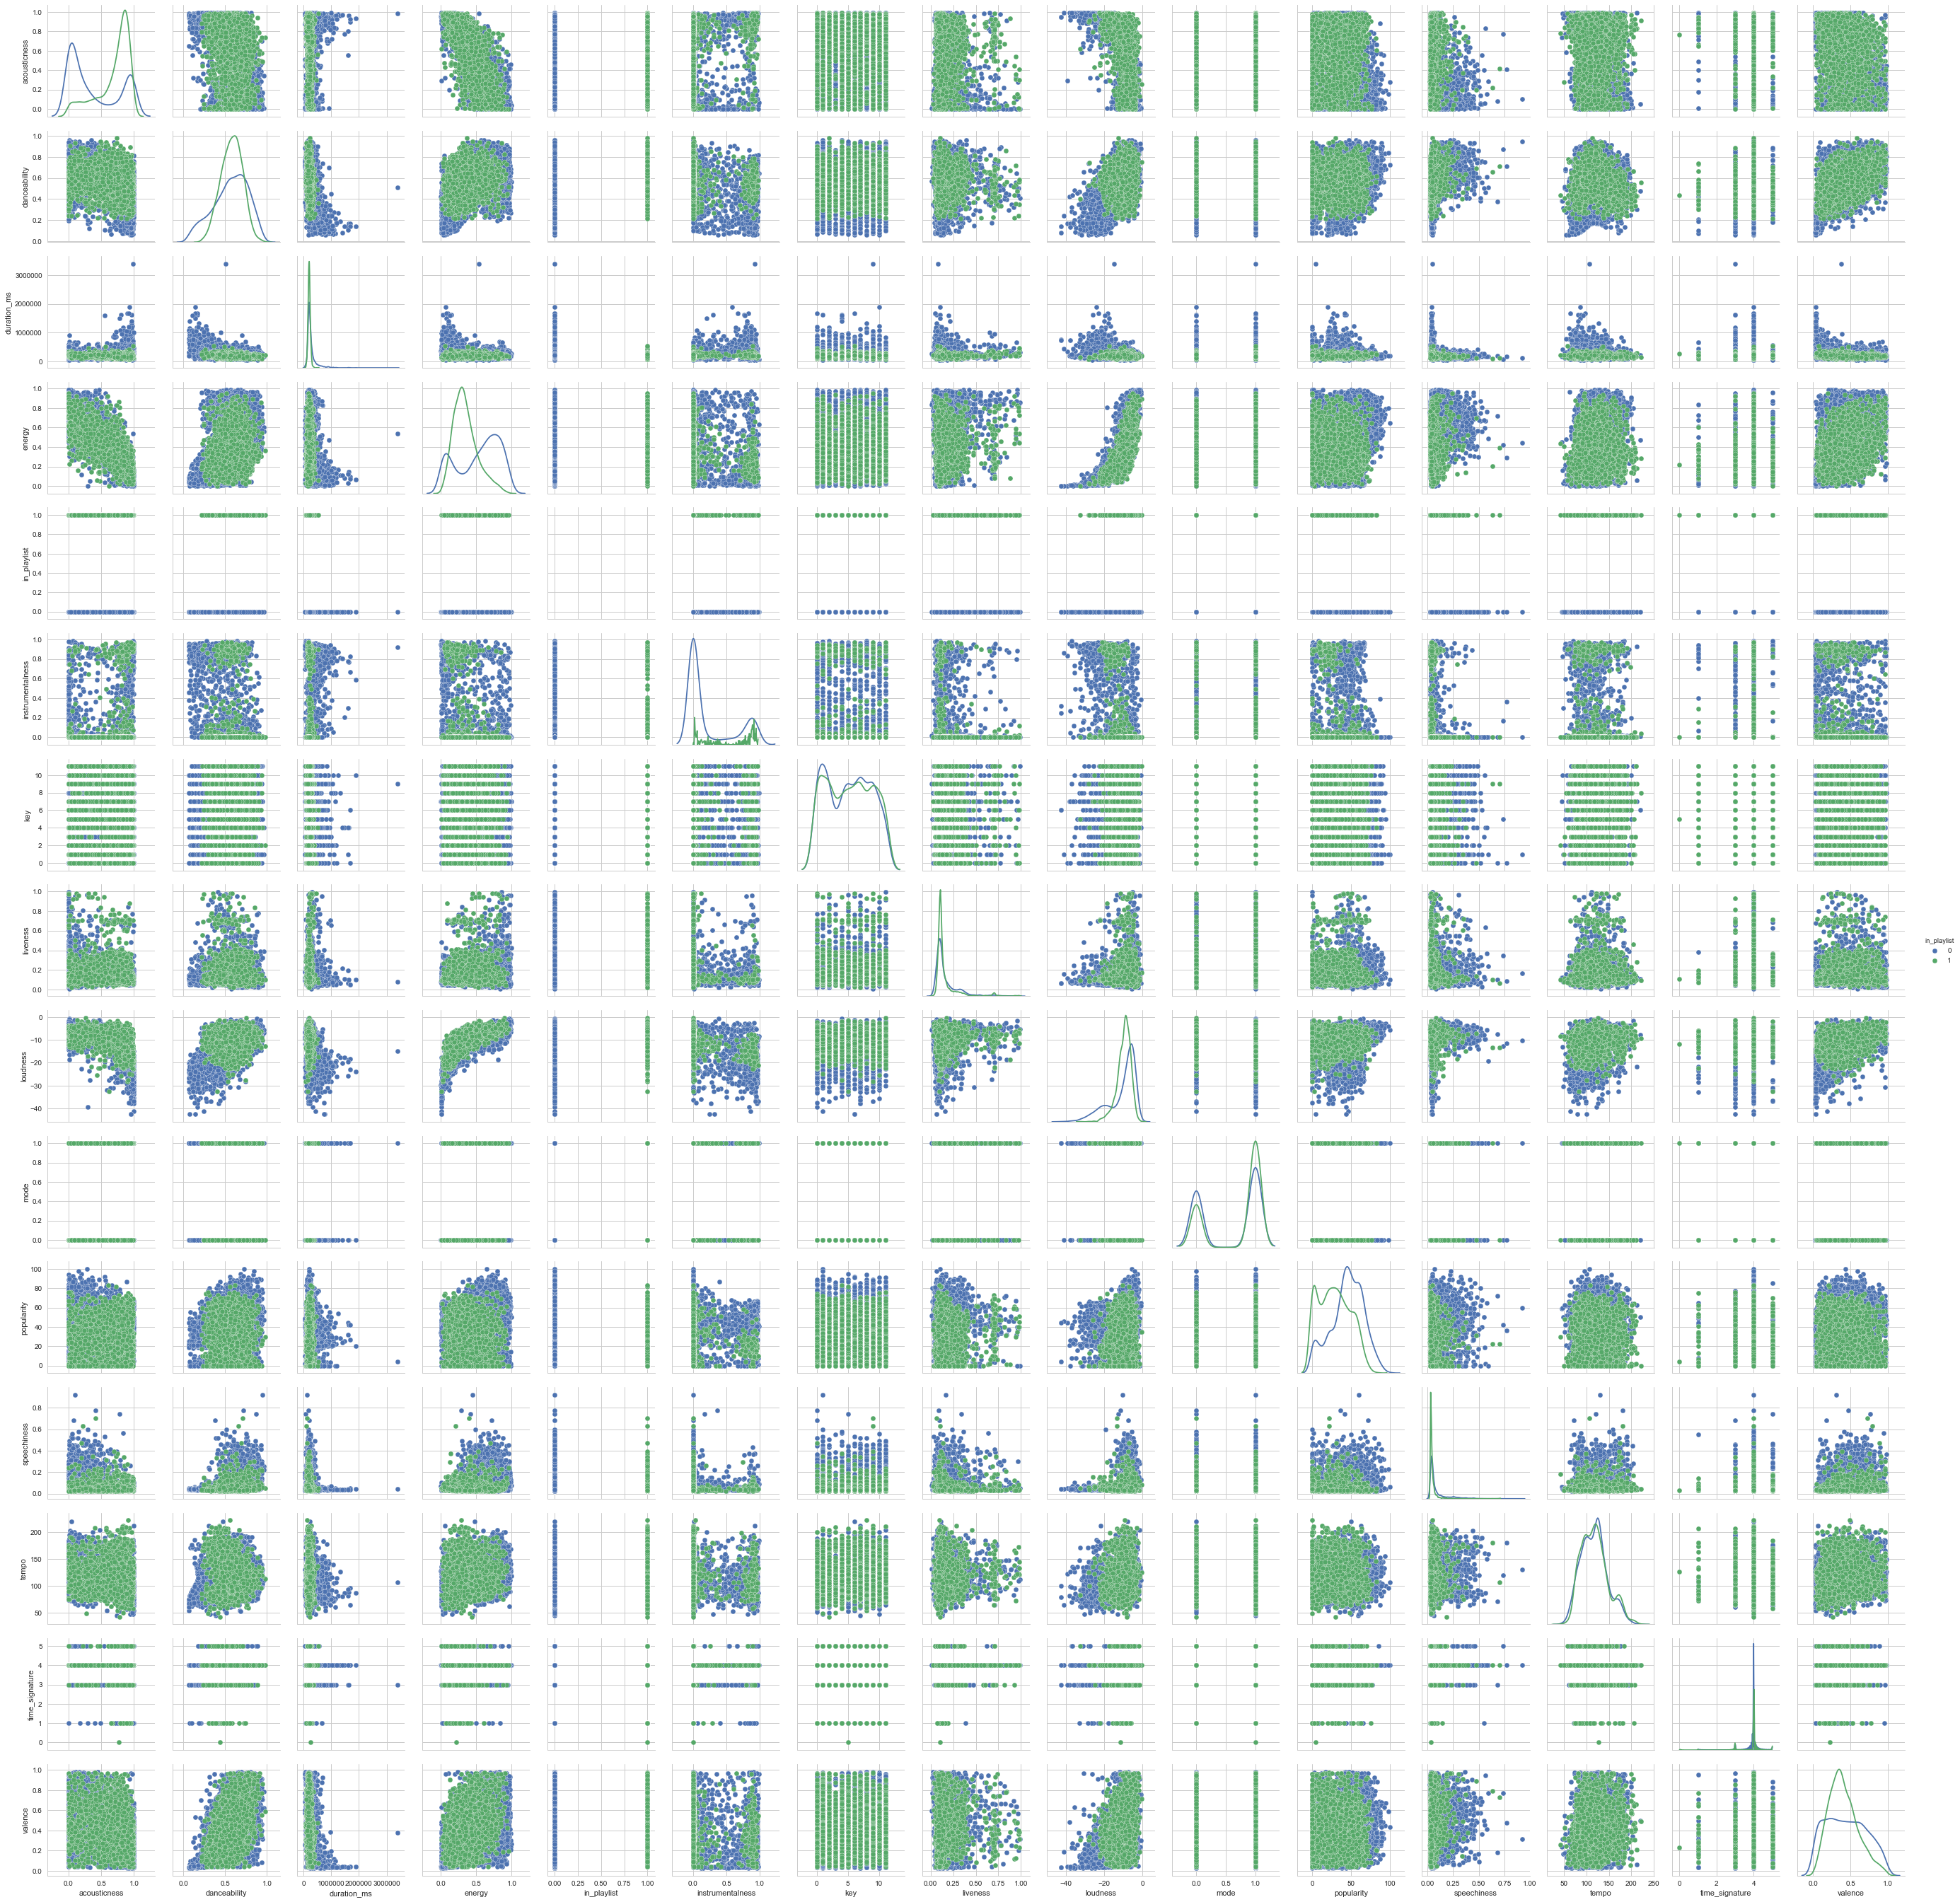

In [36]:
# pair plots
ax = sns.pairplot(spotify_df, hue = "in_playlist", diag_kind="kde")
ax
plt.show()

The pairplot above demonstrates a few interesting things. First, we notice positive correlations between loudness and energy, loudness and danceability, and danceablility and loudness. All three correlations are weak to moderate. We also notice a negative correlation between acousticness and energy. 

# Baseline Logistic Classifier

In [37]:
# set seed
random.seed(1)

# split into train and test
train, test = train_test_split(spotify_df, test_size = 0.2, random_state=1)
x_train, y_train = train.drop(columns=[response_col]), train[response_col].values
x_test, y_test = test.drop(columns=[response_col]), test[response_col].values

# create logistic model
log_reg_model = LogisticRegression(C=100000, fit_intercept=False)
log_reg_model.fit(x_train, y_train)

# predict
log_reg_train_predictions = log_reg_model.predict(x_train)
log_reg_test_predictions = log_reg_model.predict(x_test)

# calculate scores
log_reg_train_score = accuracy_score(y_train, log_reg_train_predictions)
log_reg_test_score = accuracy_score(y_test, log_reg_test_predictions)

# display scores
print('Classification accuracy for train set: {}'.format(log_reg_train_score))
print('Classification accuracy for test set: {}'.format(log_reg_test_score))

Classification accuracy for train set: 0.6897233201581028
Classification accuracy for test set: 0.682806324110672


Our baseline logistic model is able to achieve an accuracy of roughly 69% in the training set, and 68% in the test set.

# Add Quadratic Terms

In [38]:
# add quadratic terms
x_train_q = x_train.copy()
x_test_q = x_test.copy()

# add quadratic terms
for col in x_train:
    if col != "mode": # our only binary variable
        name = col + "^2" # name column as col^2
        x_train_q[name] = np.square(x_train_q[col])
        x_test_q[name] = np.square(x_test_q[col])

# create logistic model
log_reg_model_q = LogisticRegression(C=100000, fit_intercept=False)
log_reg_model_q.fit(x_train_q, y_train)

# predict
log_reg_train_q_predictions = log_reg_model_q.predict(x_train_q)
log_reg_test_q_predictions = log_reg_model_q.predict(x_test_q)

# calculate scores
log_reg_train_q_score = accuracy_score(y_train, log_reg_train_q_predictions)
log_reg_test_q_score = accuracy_score(y_test, log_reg_test_q_predictions)

# display scores
print('Classification accuracy for quadratic terms train set: {}'.format(log_reg_train_q_score))
print('Classification accuracy for quadratic test set: {}'.format(log_reg_test_q_score))

Classification accuracy for quadratic terms train set: 0.4901185770750988
Classification accuracy for quadratic test set: 0.5098814229249012


When trying to add quadratic terms, we see that the model performs worse. The test and training accuracies are both low at roughly $49\%$ and $50%$.

# kNN

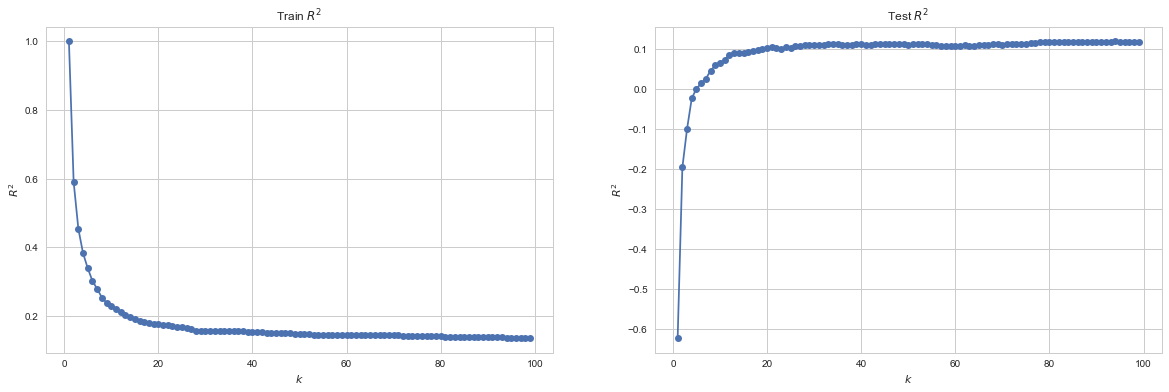

In [39]:
# make regressor
ks = range(1, 100) # Grid of k's
scores_train = [] # R2 scores
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(x_train, y_train) # Fit the model to training data
    score_train = knnreg.score(x_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)
    score_test = knnreg.score(x_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].plot(ks, scores_train,'o-')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$R^{2}$')
ax[0].set_title(r'Train $R^{2}$')
ax[1].plot(ks, scores_test,'o-')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$R^{2}$')
ax[1].set_title(r'Test $R^{2}$')
plt.show()

Our kNN regressor performs extremely poorly, achieving a maximum $R^2$ of around 0.1 in the test set.

# Regularization

In [40]:
alphas = (.1,.5,1,5,10,50,100)

# L1 regularization
lr_l1_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=100000).fit(x_train, y_train)
lr_l2_model = LogisticRegressionCV(cv=5, max_iter=100000).fit(x_train, y_train)

In [41]:
def get_lr_cv(model, model_name, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_predictions = model.predict(x_train)
    train_score = accuracy_score(y_train, train_predictions)
    test_predictions = model.predict(x_test)
    test_score = accuracy_score(y_test, test_predictions)
    test_confusion_matrix = confusion_matrix(y_test, test_predictions)
    print('[{}] Classification accuracy for train set: {}'.format(model_name, train_score))
    print('[{}] Classification accuracy for test set: {}'.format(model_name, test_score))
    return train_score, test_score, test_confusion_matrix
l1_stats = get_lr_cv(lr_l1_model, 'L1 Reg')
l2_stats = get_lr_cv(lr_l2_model, 'L2 Reg')

[L1 Reg] Classification accuracy for train set: 0.8836462450592886
[L1 Reg] Classification accuracy for test set: 0.8804347826086957
[L2 Reg] Classification accuracy for train set: 0.691699604743083
[L2 Reg] Classification accuracy for test set: 0.6887351778656127


L1 regularization performs much better than L2. The L1 regularized model achieves about 88.3% accuracy in the training data and about 88.0% in the test, well outperforming our baseline model. The L2 regularized model performs on par with our baseline, achieving a training accuracy of around 69.2% and a test accuracy of 68.9%.

# LDA and QDA

In [42]:
# LDA
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(x_train, y_train)
acc_lda = model_lda.score(x_train, y_train)
acc_lda_test = model_lda.score(x_test, y_test)

# print accuracy scores
print("LDA Accuracy, Training Set :",str(acc_lda)+'%')
print("LDA Accuracy, Testing Set :",str(acc_lda_test)+'%')


# QDA
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(x_train, y_train)
acc_qda = model_qda.score(x_train, y_train)
acc_qda_test = model_qda.score(x_test, y_test)
print("QDA Accuracy, Training Set :",str(acc_qda)+'%')
print("QDA Accuracy, Testing Set :",str(acc_qda_test)+'%')


LDA Accuracy, Training Set : 0.8809288537549407%
LDA Accuracy, Testing Set : 0.8814229249011858%
QDA Accuracy, Training Set : 0.8673418972332015%
QDA Accuracy, Testing Set : 0.8557312252964426%


LDA performs better than QDA, and both perform above baseline. LDA achieves an accuracy of about 88.1% in the training and 88.1% in the testing data, while QDA ahieves an accuracy of about 86.7% in the training and 85.6% in the testing data.

# Decision Trees

In [43]:
# classify by depth
def treeClassifierByDepth(depth, x_train, y_train, cvt = 5):
    model = DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train)
    return cross_val_score(model, x_train, y_train, cv = cvt)

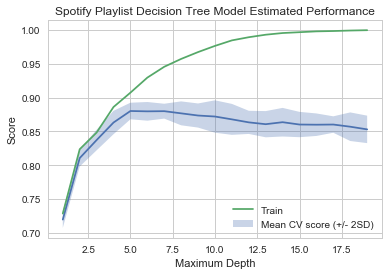

In [44]:
# 5-fold CV
means = []
lower = []
upper = []
sds = []
trains = []
for i in range(1, 20):
    # fit model
    tc = treeClassifierByDepth(i, x_train, y_train)
    # calc mean and sd
    cur_mean = np.mean(tc)
    cur_sd = np.std(tc)
    train_val = DecisionTreeClassifier(max_depth=i).fit(x_train, y_train).score(x_train,y_train)
    # add to lists
    trains.append(train_val)
    means.append(cur_mean)
    lower.append(cur_mean - 2*cur_sd)
    upper.append(cur_mean + 2*cur_sd)
    
plt.plot(range(1,20),means)
plt.fill_between(range(1,20), lower, upper, alpha = 0.3, label = "Mean CV score (+/- 2SD)")
plt.plot(range(1,20), trains, label="Train")
plt.title("Spotify Playlist Decision Tree Model Estimated Performance")
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [45]:
# cross validation performance
train_score = means[5]
print("[Decision Tree Classifier] Mean classification accuracy train: ",train_score)
print("Mean +/- 2 SD: (", lower[4],",",upper[4],")")

[Decision Tree Classifier] Mean classification accuracy train:  0.8796944138858331
Mean +/- 2 SD: ( 0.8679279855603884 , 0.8924546082545487 )


We achieve the best cross-validated score at a tree depth of $6$ with an accuracy of 88.0%. Additionally, it had a relatively narrow spread in estimated performances, as there is a roughly 2% difference between +/- two standard deviations.

In [46]:
# test set performance
model_dec_tree = DecisionTreeClassifier(max_depth=6).fit(x_train, y_train)
test_score = model_dec_tree.score(x_test, y_test)
print("[Decision Tree Classifier] Test set classification accuracy: ", test_score)

[Decision Tree Classifier] Test set classification accuracy:  0.8814229249011858


We see that it performs quite well, with an accuracy score of $88.1\%$, proving superior to all the other models we have tried so far.

# Bagging

Create 45 bootstrapped datasets, fitting a decision tree to each of them and saving their predictions:

In [47]:
# bootstrap
new_depth = 6
num_trees = 45
bagging_train_arr = []
bagging_test_arr = []
estimators = []

tree_res = []

tree = DecisionTreeClassifier(max_depth=new_depth)

# classify train and test with bootstrap models
for i in range(num_trees):
    boot_x, boot_y = resample(x_train, y_train)
    fit_tree = tree.fit(boot_x, boot_y)
    estimators.append(fit_tree)
    bagging_train_arr.append(tree.predict(x_train))
    bagging_test_arr.append(tree.predict(x_test))

Construct dataframes with all the bootstrapped data:

In [48]:
# train
bagging_train = pd.DataFrame()
for i in range(len(bagging_train_arr)):
    col_name = "Bootstrap Model " + str(i + 1)
    bagging_train[col_name] = bagging_train_arr[i]

# test
bagging_test = pd.DataFrame()
for i in range(len(bagging_test_arr)):
    col_name = "Bootstrap Model " + str(i + 1)
    bagging_test[col_name] = bagging_test_arr[i]
    
# generate renaming row obj
rename = {}

for i in range(0, 1104):
    rename[i] = "Training Row " + str(i + 1)


bagging_train.rename(rename, inplace=True)
bagging_test.rename(rename,  inplace=True)

Combine predictions from all the bootstraps and assess how the model performs:

In [49]:
# combining all data points from the data to determine accuracy
y_preds_train = []
y_preds_test = []

for row in bagging_train.iterrows():
    if np.mean(row[1]) > 0.5:
        y_preds_train.append(1)
    else:
        y_preds_train.append(0)

for row in bagging_test.iterrows():
    if np.mean(row[1]) > 0.5:
        y_preds_test.append(1)
    else:
        y_preds_test.append(0)
        
def compare_acc(preds, actual):
    count = 0
    for i in range(len(preds)):
        if preds[i] == actual.item(i):
            count += 1
    return(count/len(preds))

bagging_train_score = compare_acc(y_preds_train,y_train)
bagging_test_score = compare_acc(y_preds_test,y_test)

print("Training Accuracy: ", bagging_train_score)
print("Test Accuracy: ", bagging_test_score)

Training Accuracy:  0.9407114624505929
Test Accuracy:  0.9041501976284585


The model clearly performed better after using bootstrapped data to fit it. It has increased from 88% on the training data to 94.0%, and from 88.1% on the test data to 90.4%.

# Random Forest

In [50]:
# model random forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_depth=new_depth)

# fit model on X_train data
model_rf.fit(x_train, y_train)

# predict using model
y_pred_train_rf = model_rf.predict(x_train)
y_pred_test_rf = model_rf.predict(x_test)

# accuracy from train and test
train_score_rf = accuracy_score(y_train, y_pred_train_rf)
test_score_rf = accuracy_score(y_test, y_pred_test_rf)

# print accuracy scores
print("Random Forest Accuracy, Training Set :",str(train_score_rf)+'%')
print("Random Forest Accuracy, Testing Set :",str(test_score_rf)+'%')

Random Forest Accuracy, Training Set : 0.9261363636363636%
Random Forest Accuracy, Testing Set : 0.8893280632411067%


A random forest, at the same depth as the decision tree (namely a depth of 6) performs well too. The test data reaches an accuracy of about $92.6\%$ in the training at $89.9%$ in the test. Bagging performed better in both the training and test sets.

# Boosting

In [51]:
# define classifier function
def boostingClassifier(x_train, y_train, depth):
    # AdaBoostClassifier
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),
                         n_estimators=800, learning_rate = 0.05)
    abc.fit(x_train, y_train)
    # staged_score train to plot
    abc_predicts_train = list(abc.staged_score(x_train,y_train))
    plt.plot(abc_predicts_train, label = "train");

    # staged_score test to plot
    abc_predicts_test = list(abc.staged_score(x_test,y_test))
    plt.plot(abc_predicts_test, label = "test");

    plt.legend()
    plt.title("AdaBoost Classifier Accuracy, n = "+str(depth))
    plt.xlabel("Iterations")
    plt.show()
    
    return("Maximum test accuracy for depth of "+str(depth)+" is "+str(max(abc_predicts_test))+" at "+str(abc_predicts_test.index(max(abc_predicts_test)))+" iterations")

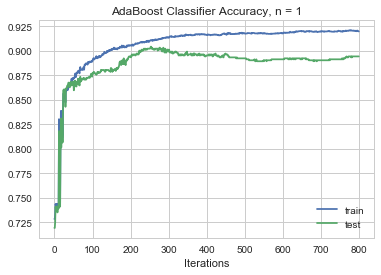

Maximum test accuracy for depth of 1 is 0.9041501976284585 at 253 iterations


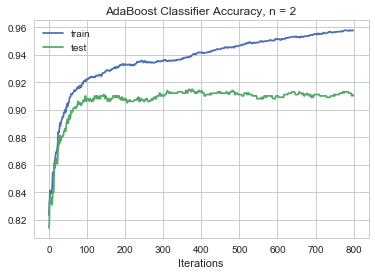

Maximum test accuracy for depth of 2 is 0.9150197628458498 at 369 iterations


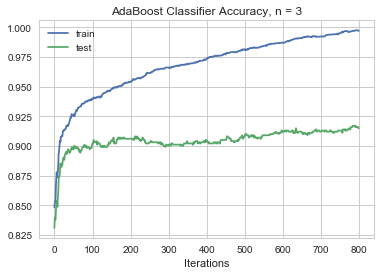

Maximum test accuracy for depth of 3 is 0.9169960474308301 at 783 iterations


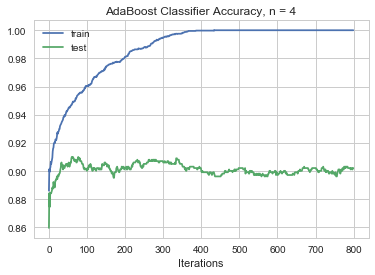

Maximum test accuracy for depth of 4 is 0.9100790513833992 at 60 iterations


In [52]:
for i in range(1,5):
    print(boostingClassifier(x_train, y_train, i))

We see based upon an AdaBoostClassifier the maximum test accuracy of $91.7\%$ is attained at a depth of 3. This is attained after 783 iterations. The AdaBoostClassifier is our best perfoming model so far.

## Moving Forward

We conclude that our boosted decision tree classifier, at a depth of 3 with 783 iterations, is the best model so far. We achieve 91.7% accuracy in the test set.